In [1]:
import hashlib as hs
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import seaborn as sns
from scipy.spatial import distance
import scipy

#%matplotlib inline 

In [2]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', 1)

In [3]:
excel_data = pd.read_excel('22MAG_HW_1_v3.xls', names=['Age', 'Number of dependents', 'Income', 'Period of residence in the region (years)', 'Assessment of the borrowers car (USD)', 'Loan amount(thousand rubles)'])

In [4]:
excel_data.shape

(51, 6)

In [5]:
excel_data.head()

,Age,Number of dependents,Income,Period of residence in the region (years),Assessment of the borrowers car (USD),Loan amount(thousand rubles)
0,45.0,3.0,33100.0,12.0,34000.0,337000.0
1,NaN,1.0,18700.0,5.0,17000.0,176000.0
2,39.0,2.0,29100.0,9.0,29000.0,289000.0
3,33.0,1.0,11400.0,6.0,10000.0,104000.0
4,28.0,1.0,20100.0,NaN,18000.0,184000.0


## Первичная обработка данных

In [6]:
excel_data.describe()

,Age,Number of dependents,Income,Period of residence in the region (years),Assessment of the borrowers car (USD),Loan amount(thousand rubles)
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,39.354167,2.041667,19552.083333,10.270833,21833.333333,201666.666667
std,9.068274,1.030561,9931.317103,4.845439,11180.022710,99842.073878
min,19.000000,0.000000,2000.000000,0.000000,0.000000,3000.000000
25%,33.000000,1.000000,9875.000000,7.000000,12750.000000,108250.000000
50%,39.500000,2.000000,19800.000000,10.000000,23000.000000,196500.000000
75%,45.000000,3.000000,28575.000000,13.000000,29250.000000,291000.000000
max,59.000000,4.000000,38600.000000,22.000000,50000.000000,382000.000000


In [7]:
columns = list(excel_data.columns)

### Построение графиков признаков

C:\Users\79063\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\79063\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


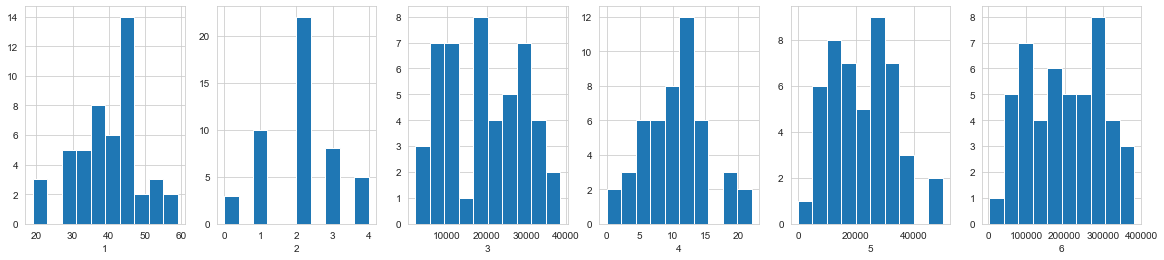

In [8]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(20,4), ncols=6)

for i in range(len(columns)):
    
    ax[i].hist(excel_data[columns[i]])
    
    ax[i].set_xlabel(i+1)

<Figure size 800x640 with 0 Axes>

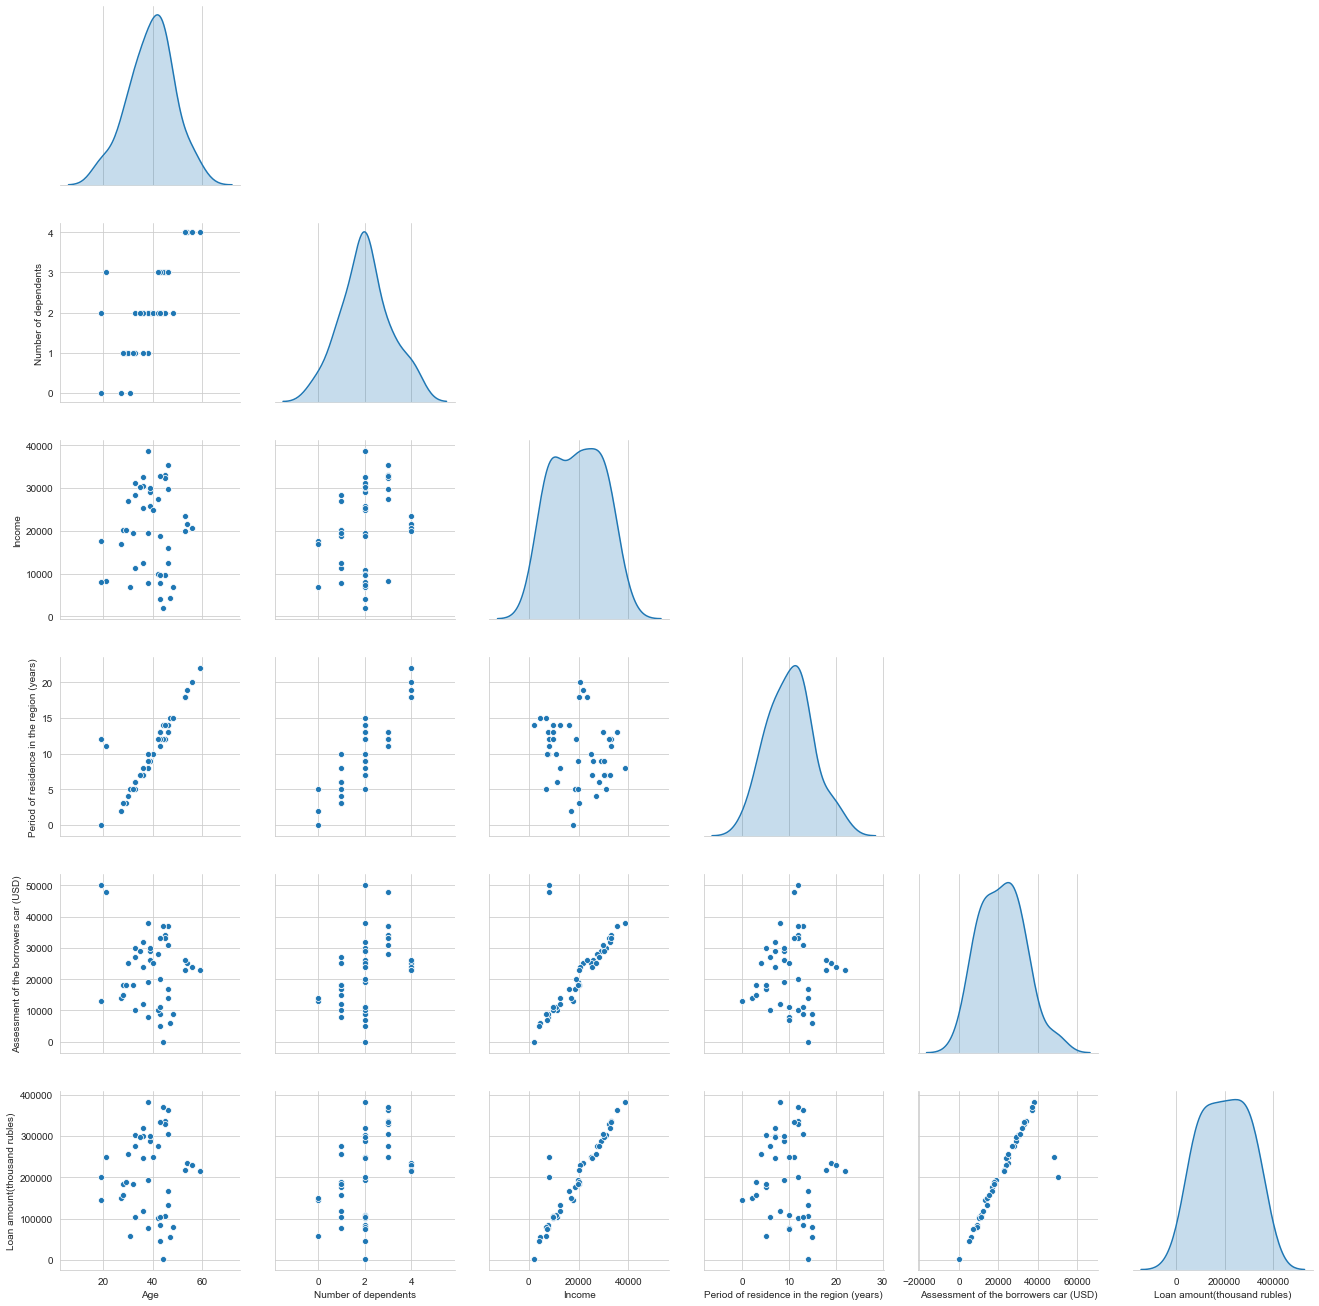

In [9]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(excel_data, diag_kind="kde", corner=True, height=3)
plt.show()

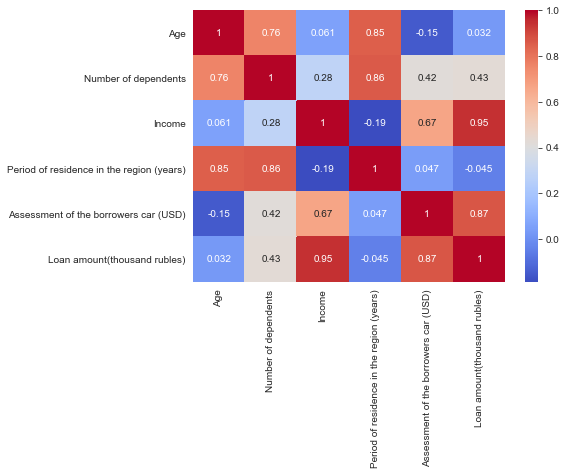

In [10]:
plt.figure(figsize=(7, 5))
sns.heatmap(excel_data.corr(), cmap="coolwarm", annot=True)

Из графиков можно видеть, что признаки Age, Number of Dependents и Period of residence in the region (years) пропорационально зависят друг от друга. Можно предположить, что чем больше возраст, тем дольше человек жил в данном регионе и тем больше у него иждивенцев.

Аналогично связаны друг с другом признаки Income, Assessment of the borrowers car (USD) и Loan amount (thousand rubles). Можно предположить, что чем больше доход, тем дороже машина и размер кредита.

Интересно заметить, что доход не зависит от возраста: так как в выборке в основном присутствуют люди 35-45 лет, то разброс дохода, а соответственно и стоимости машины и размера кредита тоже разный.

## Поиск пропусков

In [11]:
A = excel_data.isnull()

In [12]:
A.head()

,Age,Number of dependents,Income,Period of residence in the region (years),Assessment of the borrowers car (USD),Loan amount(thousand rubles)
0,False,False,False,False,False,False
1,True,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,True,False,False


In [13]:
print('Missing values by features:', A.sum(), sep='\n')

Missing values by features:
Age                                          3
Number of dependents                         3
Income                                       3
Period of residence in the region (years)    3
Assessment of the borrowers car (USD)        3
Loan amount(thousand rubles)                 3
dtype: int64


In [14]:
print('Missing values :', A.sum().sum(),)

Missing values : 18


#### Заполнение пропусков при помощи линейной регрессии

In [15]:
data_reg = excel_data.copy()

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
for column in columns:
    y_train = excel_data.dropna()[column]
    X_train = excel_data.dropna().drop(column, axis=1)
    X_test = excel_data[excel_data[column].isna()].drop(column, axis=1)
    
    clf = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)
    
    for i in clf.predict(X_test):
        data_reg = data_reg.fillna(value={column: i}, limit=1)

#### Заполнение пропусков средним значением

In [18]:
data_mean = excel_data.fillna(excel_data.mean())

#### Заполнение пропусков при помощи ЕМ-алгоритма

In [19]:
data_em = excel_data.copy()

In [20]:
# importing the package
import impyute as impy

In [21]:
#вызываем алгоритм
data_em[columns] = \
    impy.em(data_em[columns].values, loops=100)

#### Сравним результаты

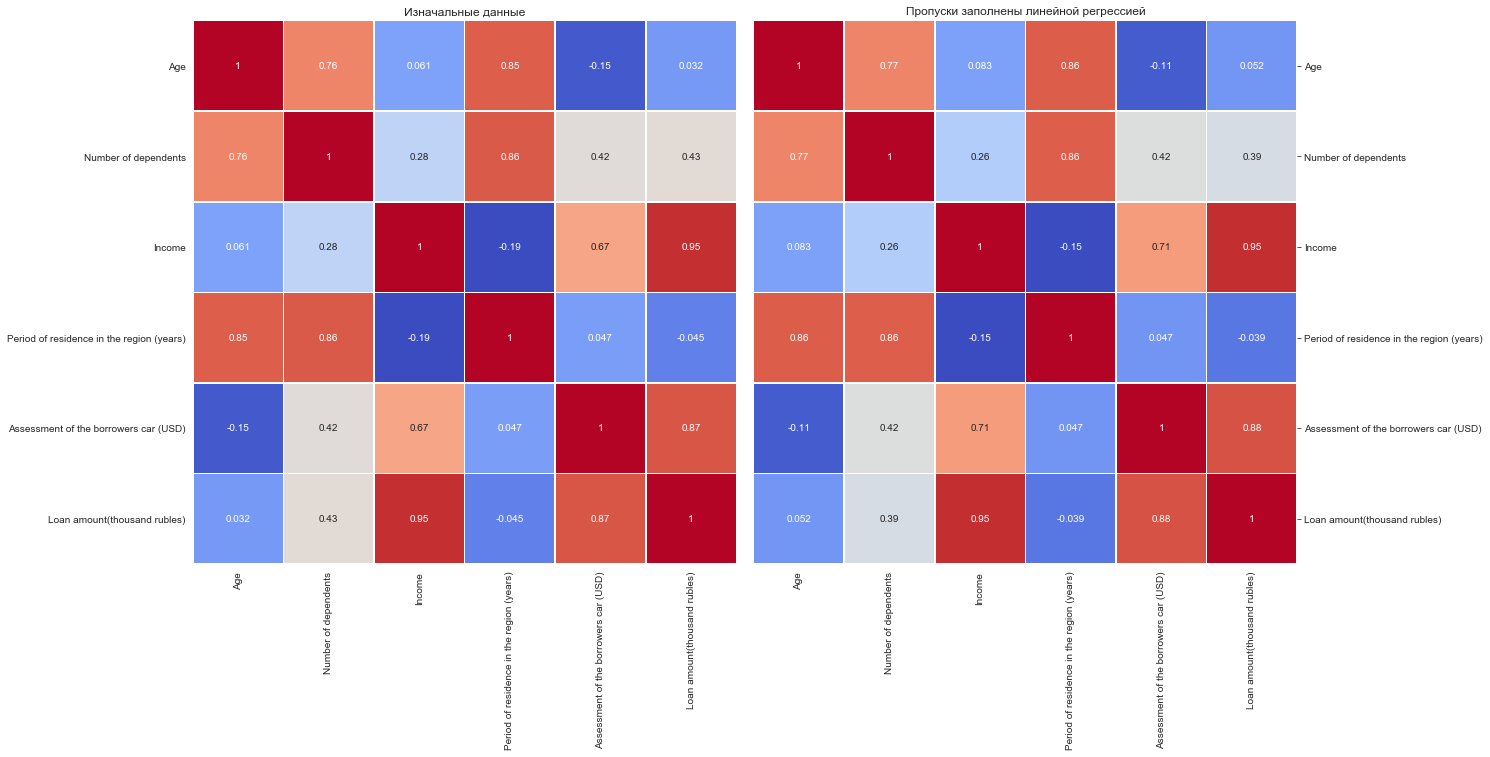

In [22]:
fig, (ax,ax2) = plt.subplots(figsize=(20,10), ncols=2)
fig.subplots_adjust(wspace=0.01)

sns.heatmap(excel_data.corr(), annot=True, square=True, cmap= "coolwarm", ax=ax, cbar=False, linewidths=.5)
ax.set_title('Изначальные данные')

sns.heatmap(data_reg.corr(), annot=True, square=True, cmap= "coolwarm", ax=ax2, cbar=False, linewidths=.5)
ax2.yaxis.tick_right()
ax2.tick_params(axis='y', rotation=0)
ax2.set_title('Пропуски заполнены линейной регрессией')

plt.show()

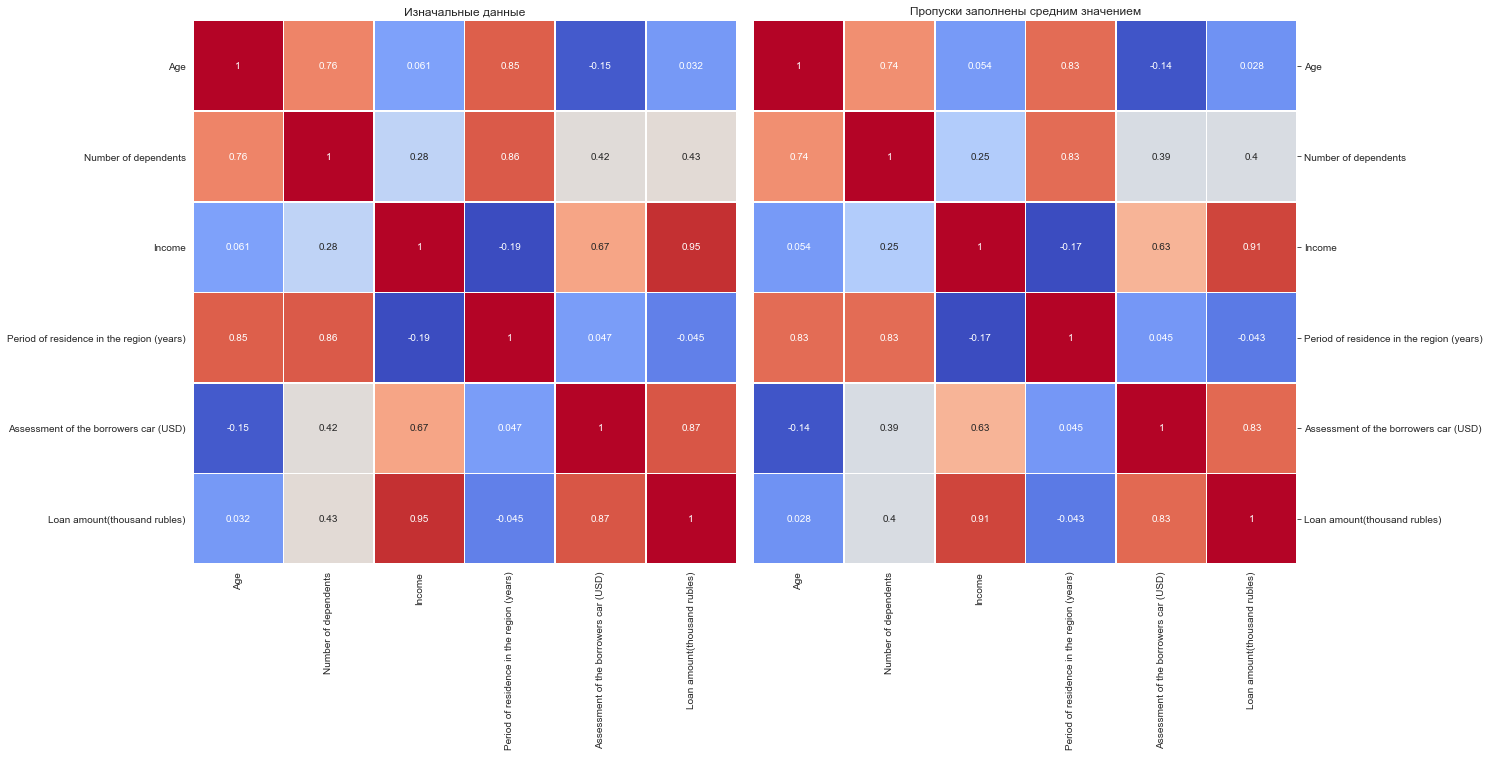

In [23]:
fig, (ax,ax2) = plt.subplots(figsize=(20,10), ncols=2)
fig.subplots_adjust(wspace=0.01)

sns.heatmap(excel_data.corr(), annot=True, square=True, cmap= "coolwarm", ax=ax, cbar=False, linewidths=.5)
ax.set_title('Изначальные данные')

sns.heatmap(data_mean.corr(), annot=True, square=True, cmap= "coolwarm", ax=ax2, cbar=False, linewidths=.5)
ax2.yaxis.tick_right()
ax2.tick_params(axis='y', rotation=0)
ax2.set_title('Пропуски заполнены средним значением')

plt.show()

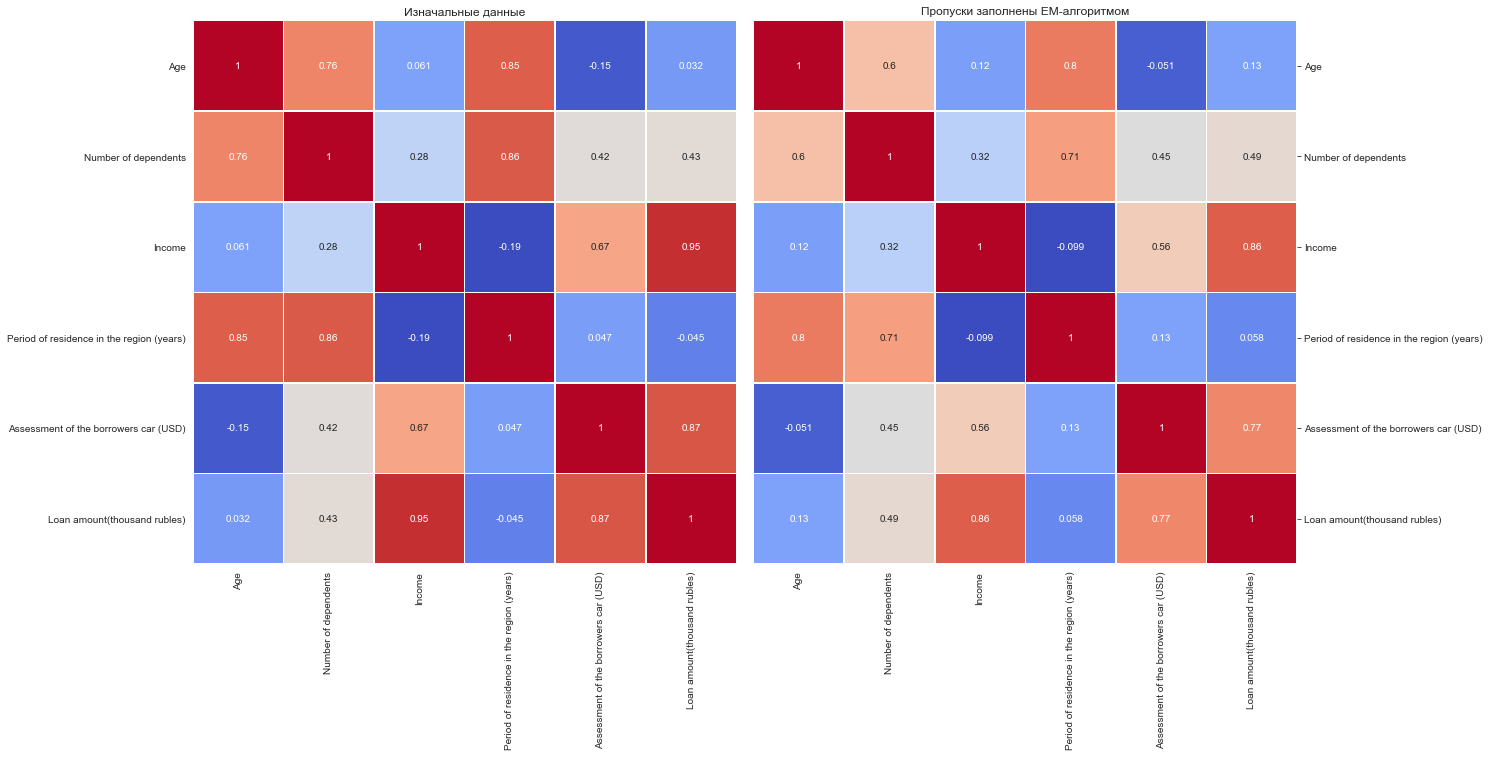

In [24]:
fig, (ax,ax2) = plt.subplots(figsize=(20,10), ncols=2)
fig.subplots_adjust(wspace=0.01)

sns.heatmap(excel_data.corr(), annot=True, square=True, cmap= "coolwarm", ax=ax, cbar=False, linewidths=.5)
ax.set_title('Изначальные данные')

sns.heatmap(data_em.corr(), annot=True, square=True, cmap= "coolwarm", ax=ax2, cbar=False, linewidths=.5)
ax2.yaxis.tick_right()
ax2.tick_params(axis='y', rotation=0)
ax2.set_title('Пропуски заполнены ЕМ-алгоритмом')

plt.show()

In [25]:
def dist(data, line):
    print("Расстояние между исходными данными и данными", line)
    for i in range(6):
        print(columns[i], ": ", round(distance.euclidean(excel_data.corr()[columns[i]], data.corr()[columns[i]]), 5))

In [26]:
dist(data_reg, "линейной регрессии")

Расстояние между исходными данными и данными линейной регрессии
Age :  0.05038
Number of dependents :  0.04127
Income :  0.05864
Period of residence in the region (years) :  0.03764
Assessment of the borrowers car (USD) :  0.05471
Loan amount(thousand rubles) :  0.04262


In [27]:
dist(data_mean, "среднего значения")

Расстояние между исходными данными и данными среднего значения
Age :  0.03889
Number of dependents :  0.0689
Income :  0.0684
Period of residence in the region (years) :  0.05244
Assessment of the borrowers car (USD) :  0.06698
Loan amount(thousand rubles) :  0.06444


In [28]:
dist(data_em, "ЕМ-алгоритма")

Расстояние между исходными данными и данными ЕМ-алгоритма
Age :  0.2251
Number of dependents :  0.23342
Income :  0.18412
Period of residence in the region (years) :  0.22842
Assessment of the borrowers car (USD) :  0.20326
Loan amount(thousand rubles) :  0.20346


Как видно из расстояния между корреляцией признаков исходных данных и корреляцией признаков заполненных данных, признак:
1. Age лучше заполнить средним значением
2. Все остальные признаки заполнить значениями линейной регрессии

In [29]:
excel_data = excel_data.fillna(value = {'Age': excel_data['Age'].mean()})

In [30]:
for i in range(1, len(columns)):
    y_train = excel_data.dropna()[columns[i]]
    X_train = excel_data.dropna().drop(columns[i], axis=1)
    X_test = excel_data[excel_data[columns[i]].isna()].drop(columns[i], axis=1)
    
    clf = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)
    
    for j in clf.predict(X_test):
        excel_data = excel_data.fillna(value={columns[i]: j}, limit=1)

In [31]:
excel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        51 non-null     float64
 1   Number of dependents                       51 non-null     float64
 2   Income                                     51 non-null     float64
 3   Period of residence in the region (years)  51 non-null     float64
 4   Assessment of the borrowers car (USD)      51 non-null     float64
 5   Loan amount(thousand rubles)               51 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


In [32]:
excel_data.describe()

,Age,Number of dependents,Income,Period of residence in the region (years),Assessment of the borrowers car (USD),Loan amount(thousand rubles)
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.354167,2.070722,19830.797173,10.217340,21478.680627,203579.458735
std,8.792018,1.006340,9929.294037,4.810614,11196.167801,97399.748042
min,19.000000,0.000000,2000.000000,0.000000,0.000000,3000.000000
25%,34.000000,1.500000,10350.000000,7.000000,12122.654293,114000.000000
50%,39.354167,2.000000,19600.000000,10.000000,23000.000000,200000.000000
75%,45.000000,2.833763,28750.000000,13.000000,29116.451203,283000.000000
max,59.000000,4.000000,38600.000000,22.000000,50000.000000,382000.000000


### Удаление выбросов

#### Через расстояние Махаланобиса

In [33]:
def MahalanobisDist(y, data, cov=None):
  
    y_mu = y - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(y_mu, inv_covmat)
    mahal = np.dot(left, y_mu.T)
    return mahal.diagonal()

In [34]:
Mahal_dist = MahalanobisDist(excel_data, excel_data)

In [35]:
print(Mahal_dist)

[ 2.48706694 30.76284197  1.42498414  2.20890841  3.94804665  3.71842653
  1.5807006   2.22778402  0.58120134  1.99860087  5.97420433  2.81078355
  2.15123876 45.12917582  4.2031909   0.67285246  0.96085233  4.46390342
  3.96970921  3.82402278 16.60195445  2.55410205  6.94183917  3.89262065
  0.9899002   1.60016523  2.15117201  3.25435718  5.14658492  2.56792412
 10.2082371   5.70863061  5.86032645  4.92786822  7.15286085  5.43302452
  2.10264125  1.3055969   2.16072073  6.16924082 46.40823711  2.98491477
  5.27567739  1.35652781  3.12796117  1.66189066  7.24724658  1.72161744
  4.13024623  2.31767881  1.93973956]


In [38]:
def MD_detectOutliers(data, extreme=False, verbose=False):
    MD = MahalanobisDist(y=data, data=data)
  

    std = np.std(MD)
    k = 4. * std if extreme else 3. * std
    m = np.mean(MD)
    up_t = m + k
    low_t = m - k
    outliers = []
    for i in range(len(MD)):
        if (MD[i] >= up_t) or (MD[i] <= low_t):
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

In [37]:
outliers = np.array(excel_data)

outliers_indices = MD_detectOutliers(excel_data, verbose=True)


print("Outliers Indices: {}\n".format(outliers_indices))
print("Outliers:")
for ii in outliers_indices:
    print(outliers[ii])

Outliers Indices: [13 40]

Outliers:
[2.1e+01 3.0e+00 8.2e+03 1.1e+01 4.8e+04 2.5e+05]
[1.9e+01 2.0e+00 8.0e+03 1.2e+01 5.0e+04 2.0e+05]


#### Через ящик с усами

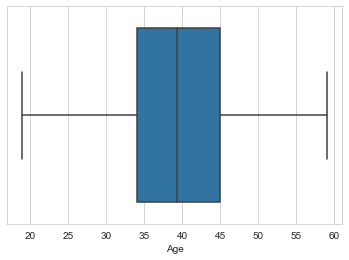

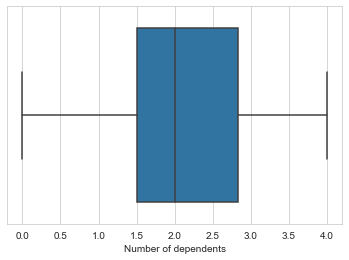

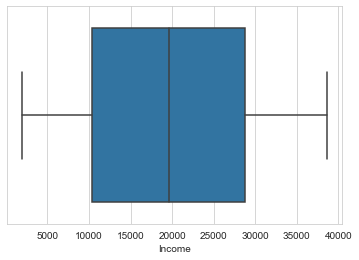

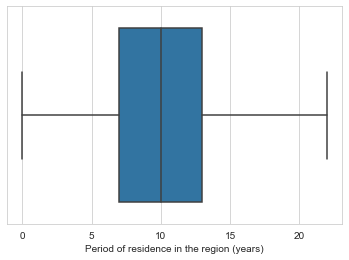

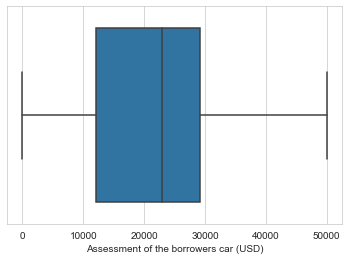

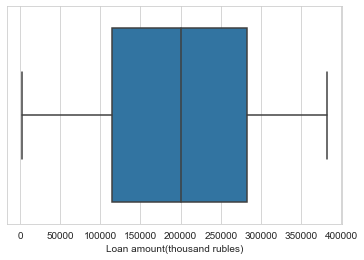

In [41]:
for column in columns:
    ax = sns.boxplot(x=column, data=excel_data)
    plt.show()

На графиков с ящиками с усами выбросов не получается заметить, но по расстоянию Махалонобиса получается, что в данных присутствуют 2 выброса. Если посмотреть на точечные графики, на них заметны (особенно на графиках с линейно зависимыми признаками) 2 выброса. Их и удалим

<Figure size 800x640 with 0 Axes>

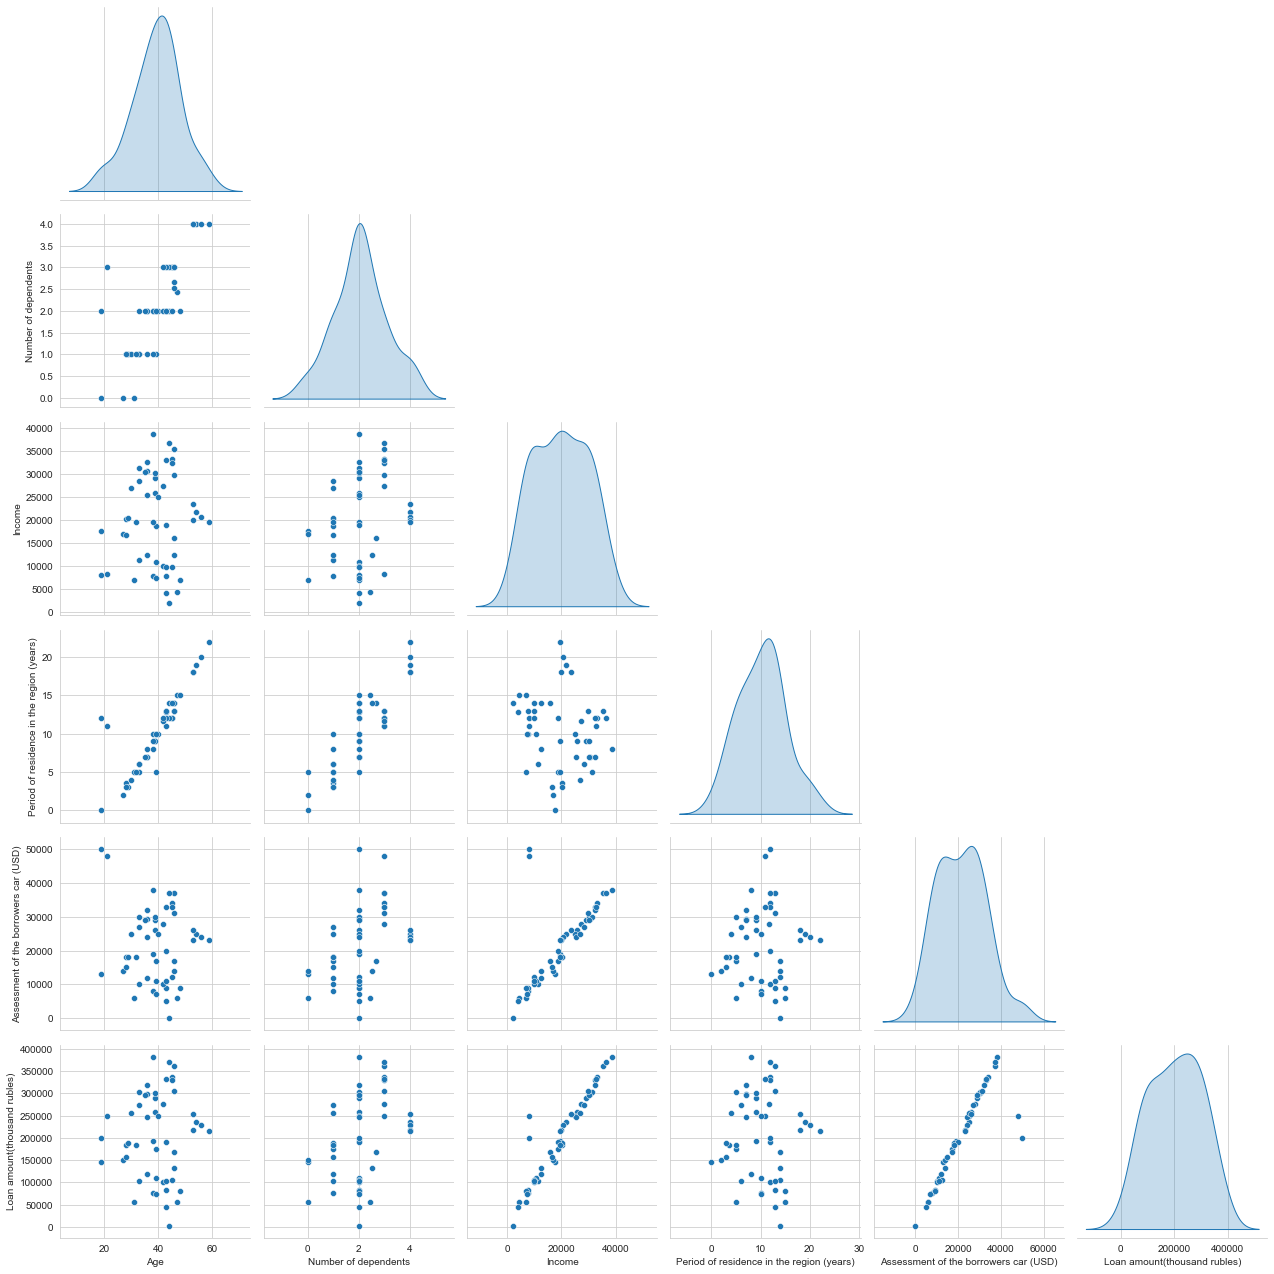

In [42]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(excel_data, diag_kind="kde", corner=True, height=3)
plt.show()

In [43]:
excel_data.drop(labels = outliers_indices,axis = 0)
print('Outliers were deleted')

Outliers were deleted


## Снижение размерности. Метод PCA

### Центрирование и нормировка данных

In [44]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import preprocessing

In [45]:
df_centered = excel_data.apply(lambda x: x-x.mean())

In [46]:
Z = preprocessing.normalize(df_centered, norm='l2', axis=0) 
df_normalized = pd.DataFrame(Z, columns=excel_data.columns)
df_normalized.head()

,Age,Number of dependents,Income,Period of residence in the region (years),Assessment of the borrowers car (USD),Loan amount(thousand rubles)
0,0.090814,0.130592,0.188991,0.052406,0.158160,0.193722
1,0.000000,-0.150469,-0.016106,-0.153378,-0.056571,-0.040045
2,-0.005697,-0.009939,0.132020,-0.035787,0.095004,0.124028
3,-0.102208,-0.150469,-0.120079,-0.123980,-0.144990,-0.144586
4,-0.182634,-0.150469,0.003834,-0.195699,-0.043940,-0.028429


In [47]:
for col in df_normalized.columns:
    print(col, f'l2-norm: {round(np.linalg.norm(df_normalized[col], ord=2), 1)}')

Age l2-norm: 1.0
Number of dependents l2-norm: 1.0
Income l2-norm: 1.0
Period of residence in the region (years) l2-norm: 1.0
Assessment of the borrowers car (USD) l2-norm: 1.0
Loan amount(thousand rubles) l2-norm: 1.0


### SVD разложение матрицы

In [48]:
U, S, Vt = np.linalg.svd(df_normalized,  full_matrices=False,  compute_uv=True)

In [49]:
print(f'Singular values: {np.around(S, 2)}')
sqr_singular_values = S ** 2
print(f'Sqr singular values: {np.around(sqr_singular_values, 2)}')
total_variance = np.sum(sqr_singular_values)
print(f'Total variance: {total_variance:.2f}')
explained_variances = S ** 2 / total_variance
print(f'Explained variances: {np.around(explained_variances, 2)}')

Singular values: [1.74 1.56 0.69 0.24 0.1  0.04]
Sqr singular values: [3.03 2.42 0.48 0.06 0.01 0.  ]
Total variance: 6.00
Explained variances: [0.51 0.4  0.08 0.01 0.   0.  ]


In [50]:
explained_var_2fact = np.sum(explained_variances[:2])
print('Proportion of the explained variation with 2 factors', round(explained_var_2fact * 100, 0), '%')

Proportion of the explained variation with 2 factors 91.0 %


In [51]:
k = 2
Zk = U.dot(np.diag(S)[:,:k].dot(Vt[:k, :]))
print('Original Z matrix:')
print(np.around(Z[:5], 2))

print('\nApproximated Z matrix by 2 factors:')
print(np.around(Zk[:5], 2))

Original Z matrix:
[[ 0.09  0.13  0.19  0.05  0.16  0.19]
 [ 0.   -0.15 -0.02 -0.15 -0.06 -0.04]
 [-0.01 -0.01  0.13 -0.04  0.1   0.12]
 [-0.1  -0.15 -0.12 -0.12 -0.14 -0.14]
 [-0.18 -0.15  0.   -0.2  -0.04 -0.03]]

Approximated Z matrix by 2 factors:
[[ 0.07  0.14  0.17  0.06  0.17  0.19]
 [-0.1  -0.11 -0.04 -0.1  -0.04 -0.05]
 [-0.03  0.02  0.11 -0.04  0.11  0.12]
 [-0.11 -0.16 -0.13 -0.11 -0.13 -0.15]
 [-0.17 -0.18 -0.01 -0.18 -0.02 -0.03]]


In [52]:
Z_errors = Z - Zk
#enorm_F = np.linalg.norm(Z_errors, ord='fro') ** 2
#enorm_2 = np.linalg.norm(Z_errors, ord=2)
err_norm_2 = (np.linalg.norm(Z_errors, ord=2)) / (np.linalg.norm(Z, ord=2))
err_norm_F = (np.linalg.norm(Z_errors, ord='fro') ** 2) / (np.linalg.norm(Z, ord='fro') ** 2)

print('Approx error in Spectral matrix norm:', round(err_norm_2, 2))
print('Approx error in Frobenius norm:', round(err_norm_F, 2))

Approx error in Spectral matrix norm: 0.4
Approx error in Frobenius norm: 0.09


In [53]:
fact_k = U[:, :k]
fact_k[:5]

array([[-0.19923679, -0.04350823],
       [ 0.09540392, -0.06133156],
       [-0.08118113, -0.09374896],
       [ 0.18460085, -0.01861422],
       [ 0.12200356, -0.14417181]])

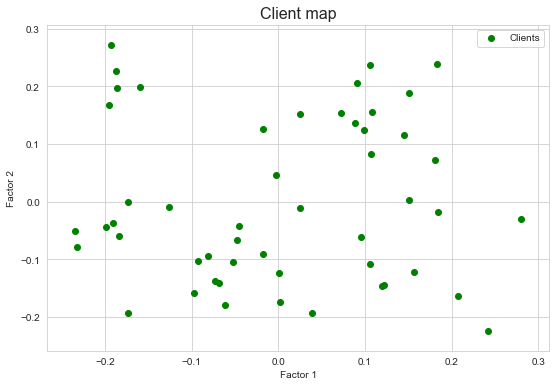

In [54]:
plt.figure(figsize=(9, 6))
plt.scatter(fact_k[:, 0], fact_k[:, 1], label='Clients', color='green')
plt.legend()
plt.ylabel('Factor 2')
plt.xlabel('Factor 1')
plt.title('Client map', fontsize=16)
plt.show()

### Снижение размерности. Интерпретация скрытых признаков.

In [55]:
k = 2
coef_matrix = Vt.T[:, :2].dot(np.diag(S[:k]))
print('Matrix of coefficients:\n')
for i, feature in enumerate(df_normalized.columns):
    print(f'(z{i+1}) {feature} = {coef_matrix[i, 0]:.2f}*u1 + {coef_matrix[i, 1]:.2f}*u2')

Matrix of coefficients:

(z1) Age = -0.51*u1 + 0.78*u2
(z2) Number of dependents = -0.82*u1 + 0.52*u2
(z3) Income = -0.74*u1 + -0.56*u2
(z4) Period of residence in the region (years) = -0.51*u1 + 0.84*u2
(z5) Assessment of the borrowers car (USD) = -0.77*u1 + -0.50*u2
(z6) Loan amount(thousand rubles) = -0.84*u1 + -0.54*u2


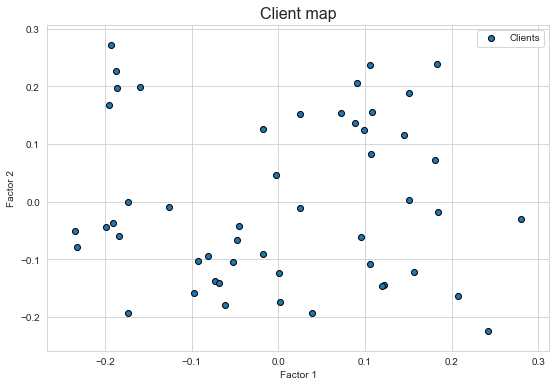

In [59]:
plt.figure(figsize=(9, 6))
plt.scatter(fact_k[:, 0], fact_k[:, 1], label='Clients', edgecolors='black')
plt.legend()
plt.ylabel('Factor 2')
plt.xlabel('Factor 1')
plt.title('Client map', fontsize=16)
plt.show()

Исходя из значений данной матрицы, сложно дать конкретную интерпретацию данным факторам, так как их вклад в разные признаки не очень сильно друг от друга отличается. Но можно предположить, что первая компонента отвечает за размер кредита, доход, число иждивенцев и стоимость машины, то есть можно обозначить ее как "Уровень жизни", а вторая компонента отвечает за возраст и количество лет, проведенных в районе, то есть можно обозначить как "Продолжительность жизни".

## Снижение размерности. Метод MDS

In [60]:
d = {'euclidean': distance.pdist(df_normalized, 'euclidean'),
     'cityblock': distance.pdist(df_normalized, 'cityblock'),
     'minkowski_6': distance.pdist(df_normalized, 'minkowski', p=6),
     'cosine': distance.pdist(df_normalized, 'cosine'),
     'chebyshev': distance.pdist(df_normalized, 'chebyshev')}

In [61]:
D = pd.DataFrame(d)
D.shape

(1275, 5)

In [62]:
D_corr = D.corr().loc[['cityblock', 'euclidean', 'minkowski_6', 'chebyshev', 'cosine'],
                      ['cityblock', 'euclidean', 'minkowski_6', 'chebyshev', 'cosine']
                     ]
D_corr

,cityblock,euclidean,minkowski_6,chebyshev,cosine
cityblock,1.000000,0.977609,0.923258,0.899424,0.758867
euclidean,0.977609,1.000000,0.980552,0.960559,0.783798
minkowski_6,0.923258,0.980552,1.000000,0.993379,0.754379
chebyshev,0.899424,0.960559,0.993379,1.000000,0.716760
cosine,0.758867,0.783798,0.754379,0.716760,1.000000


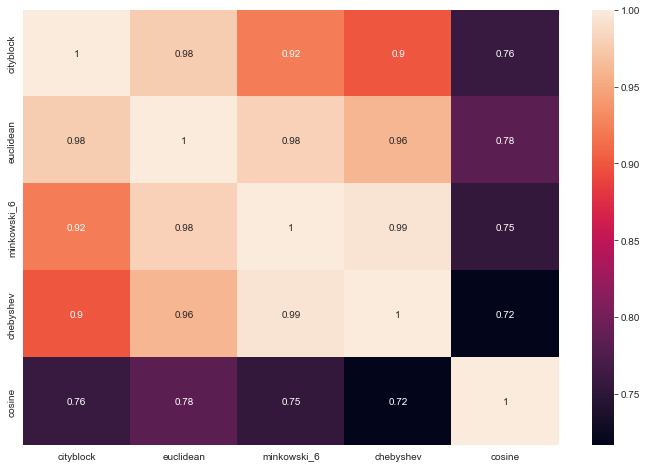

In [63]:
plt.figure(figsize=(12, 8))
sns.heatmap(D_corr, annot=True)
plt.show()

Косинусное расстояние сильно отличается от остальных расстояний, поэтому рассмотрим MDS с евклидовым расстоянием.

In [64]:
from scipy.spatial import distance_matrix

In [65]:
dist_euc = distance_matrix(df_normalized, df_normalized)

In [66]:
np.around(dist_euc[:5, :10], 2)

array([[0.  , 0.52, 0.22, 0.67, 0.58, 0.69, 0.27, 0.02, 0.27, 0.21],
       [0.52, 0.  , 0.32, 0.2 , 0.19, 0.48, 0.33, 0.51, 0.27, 0.35],
       [0.22, 0.32, 0.  , 0.48, 0.37, 0.61, 0.08, 0.21, 0.07, 0.02],
       [0.67, 0.2 , 0.48, 0.  , 0.23, 0.42, 0.49, 0.65, 0.41, 0.5 ],
       [0.58, 0.19, 0.37, 0.23, 0.  , 0.6 , 0.34, 0.57, 0.32, 0.39]])

In [67]:
#ищем матрицу S
n = dist_euc.shape[0]
C = np.eye(n) - 1 / n * np.ones((n, n))
S = - 1/2 * C @ (dist_euc ** 2) @ C

In [68]:
#проверим, что матрица S - неотрицательно определена (все собственные значения должны быть >= 0)
eigenvals = np.linalg.eigvalsh(S)
np.around(eigenvals, 2)

array([-0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
       -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
       -0.  , -0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.01,  0.06,  0.48,  2.42,  3.03])

Так как матрица S неотрицательно определена, то клиентов банка монжо поместить в евклидово пространство размерности 2 с
сохранением расстояний между клиентами.

In [69]:
from sklearn.manifold import MDS

In [70]:
mds = MDS(n_components=2, max_iter=300, dissimilarity='euclidean')
embeddings = mds.fit_transform(df_normalized)
print(f'Stress value: {round(mds.stress_, 2)}')
embeddings.shape

Stress value: 1.98


(51, 2)

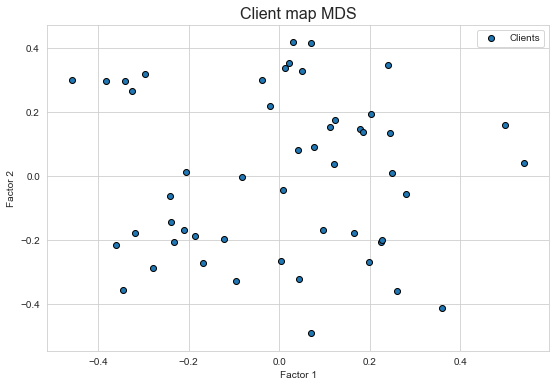

In [71]:
plt.figure(figsize=(9, 6))
plt.scatter(embeddings[:, 0], embeddings[:, 1], label='Clients', edgecolors='black')
plt.legend()
plt.ylabel('Factor 2')
plt.xlabel('Factor 1')
plt.title('Client map MDS', fontsize=16)
plt.show()

Для сравнения рассмотрим карту клиентов через PCA

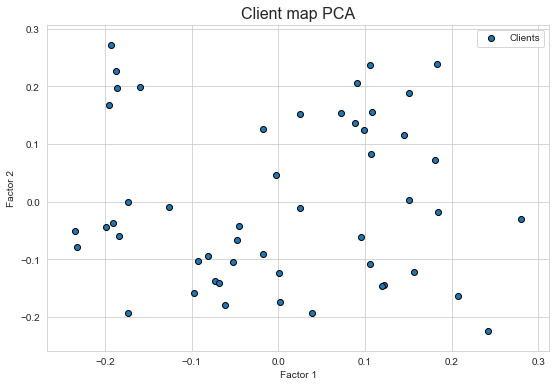

In [72]:
plt.figure(figsize=(9, 6))
plt.scatter(fact_k[:, 0], fact_k[:, 1], label='Clients', edgecolors='black')
plt.legend()
plt.ylabel('Factor 2')
plt.xlabel('Factor 1')
plt.title('Client map PCA', fontsize=16)
plt.show()

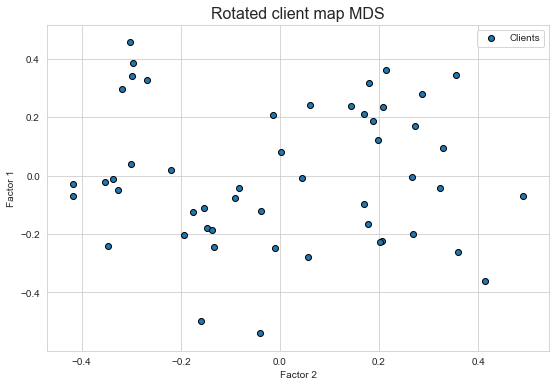

In [82]:
plt.figure(figsize=(9, 6))
plt.scatter(-1 * embeddings[:, 1], -1 * embeddings[:, 0], label='Clients', edgecolors='black')
plt.legend()
plt.ylabel('Factor 1')
plt.xlabel('Factor 2')
plt.title('Rotated client map MDS', fontsize=16)
plt.show()

Если отразить карту клиентов по MDS относительно начала координат, то получится карта клиентов по PCA. Монжо сделать вывод, что оба фактора, найденные обоими способами, несут в себе диаметрально противоположный по значениям смысл, но при этом объединяет одни и те же исходные признаки.